## DifferentialEquations.jlの紹介


In [5]:
# 問題の定義
using DifferentialEquations
using Plots

In [2]:
function f(du,u,p,t)
  du[1] = u[2]
  du[2] = -p
end

f (generic function with 1 method)

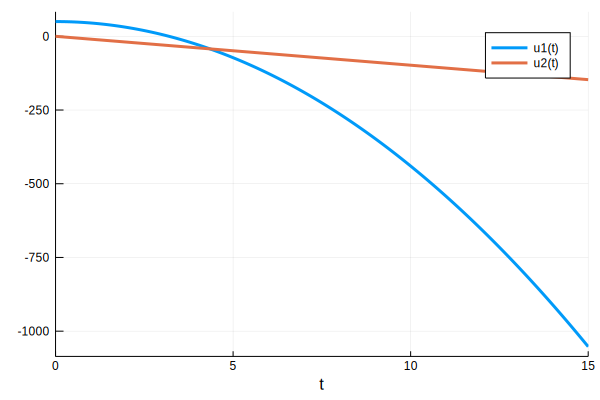

In [6]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = 9.8
prob = ODEProblem(f,u0,tspan,p)
#sol = solve(prob,Tsit5(),callback=cb)
sol = solve(prob,Tsit5())
plot(sol)

In [7]:
function condition(u,t,integrator) # Event when event_f(u,t) == 0
  u[1]
end

condition (generic function with 1 method)

In [102]:
using Printf
function condition(u,t,integrator) # Event when event_f(u,t) == 0
    tspan = range((itg.t-1), stop=itg.t, length=10)
    u_ave = 0.0
    for tspan_each in tspan
        if tspan_each > 0
            u_ave += integrator(t)[1]
        end
    end
    #@printf("%f\n", println(u_ave))
    u_ave = u_ave / Float64(length(tspan))
end

condition (generic function with 1 method)

In [115]:
function condition(u,t,integrator) # Event when event_f(u,t) == 0
    ts = range(t-1.0, stop=t, length=100)
    u_ave = 0.0
    for (u2,t2) in TimeChoiceIterator(integrator, ts)
      u_ave += u2[1]
      #@show u,t
    end    
    u_ave = u_ave / Float64(length(ts))
    @show ts
    u_ave
end

condition (generic function with 1 method)

In [116]:
function affect!(integrator)
  integrator.u[2] = -integrator.u[2]
  #integrator.p = -integrator.p
  #nothing
end

function affect_neg!(integrator)
    integrator.p = -integrator.p
    #nothing
end

affect_neg! (generic function with 1 method)

In [117]:
cb = ContinuousCallback(condition,affect!)

ContinuousCallback{typeof(condition),typeof(affect!),typeof(affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),Float64,Int64,Nothing}(condition, affect!, affect!, DiffEqBase.INITIALIZE_DEFAULT, nothing, true, 10, Bool[true, true], 2.220446049250313e-15, 0)

In [45]:
#step!(itg)
#itg(range((itg.t-0.01), stop=itg.t, length=10))
itg(0.1)[1]

49.95099999999989

In [21]:
itg.p[]

9.8

ts = -1.0:0.010101010101010102:0.0
ts = -0.999897961224449:0.0101010101010101:0.00010203877555101957
ts = -0.9999886623582721:0.0101010101010101:1.1337641727891062e-5
ts = -0.9999773247165442:0.0101010101010101:2.2675283455782123e-5
ts = -0.9999659870748163:0.0101010101010101:3.401292518367319e-5
ts = -0.9999546494330884:0.0101010101010101:4.535056691156425e-5
ts = -0.9999433117913605:0.0101010101010101:5.668820863945532e-5
ts = -0.9999319741496326:0.0101010101010101:6.802585036734638e-5
ts = -0.9999206365079047:0.0101010101010101:7.936349209523744e-5
ts = -0.9999092988661769:0.0101010101010101:9.07011338231285e-5
ts = -0.999897961224449:0.0101010101010101:0.00010203877555101957
ts = -0.999897961224449:0.0101010101010101:0.00010203877555101957
ts = -0.9988775734689388:0.010101010101010102:0.0011224265310612151
ts = -0.99978458480717:0.0101010101010101:0.0002154151928299302
ts = -0.9996712083898912:0.010101010101010102:0.0003287916101088408
ts = -0.9995578319726123:0.010101010101010102:

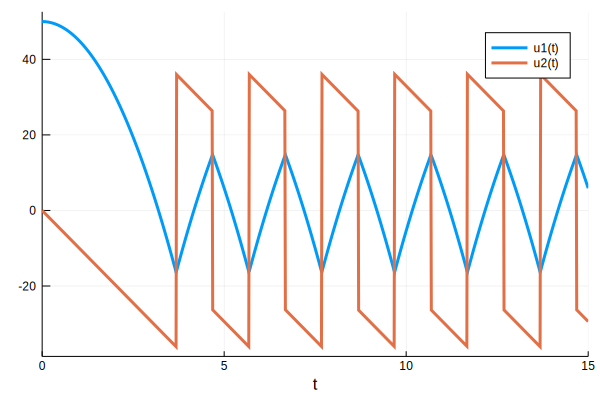

In [118]:
u0 = [50.0,0.0]
tspan = (0.0,15.0)
p = 9.8
prob = ODEProblem(f,u0,tspan,p)
sol = solve(prob,Tsit5(),callback=cb)
plot(sol)